<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-24 10:32:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-12-24 10:32:39 (12.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
print(df.shape)
df.columns

(346, 10)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [5]:
kf  = df[['loan_status', 'Principal', 'terms','effective_date', 'due_date', 'age', 'education', 'Gender']] # discard the col1 and column 2 as they are index
df = kf

In [6]:
#df['Unnamed: 0.1']
df.shape

(346, 8)

### Convert to date time object 

In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(10)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



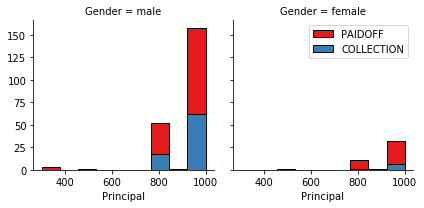

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

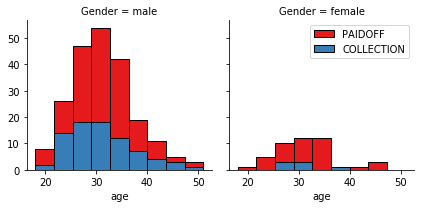

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

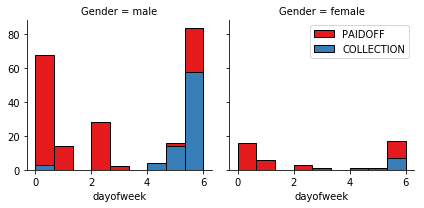

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=False)

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [22]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [23]:
df['loan_status'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
y = df['loan_status'].values
print("How many % are in PAIDOFF category:",(1-np.sum(y)/y.shape[0])*100)

How many % are in PAIDOFF category: 75.14450867052022


Sine 75% fall in PAIDOFF category, the accuracy of the classifier should be greater than 75%

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [25]:
prepro = preprocessing.StandardScaler().fit(X)
X = prepro.transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 4)
x1, x2, y1, y2 = train_test_split(X, y,test_size = 0, random_state = 4)

In [28]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(259, 8) (259,) (87, 8) (87,)


Train Model and predict the labels

In [29]:
k = 4
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [30]:
yhat = KNN.predict(x_train)

In [31]:
#Accuracy of Model trained
print("accuracy of 4-KNN",np.sum(yhat == y_train)/y_train.shape[0]*100,"%")
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNN.predict(x_test)))
print("jaccard_similarity_score:",jaccard_similarity_score(y_test,KNN.predict(x_test)))
print("f1_score:", f1_score(y_test, KNN.predict(x_test), average='weighted') )

accuracy of 4-KNN 79.92277992277992 %
Train set Accuracy:  0.7992277992277992
Test set Accuracy:  0.7471264367816092
jaccard_similarity_score: 0.7471264367816092
f1_score: 0.6937420178799489


**Finding Best value of K for KNN**

In [32]:
Ks  =  range(1,14)
test_accuracies = np.zeros((13))
for k in Ks:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    yhat = KNN.predict(x_test)
    test_accuracies[k-1] = f1_score(y_test, yhat, average='weighted') #metrics.accuracy_score(y_test, yhat)
    #print(k,f1_score(y_test, yhat, average='weighted'))

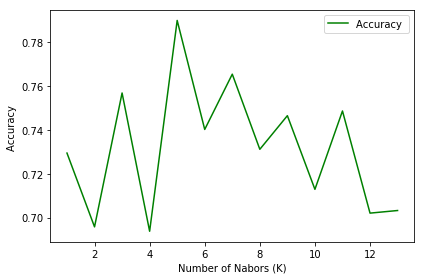

In [33]:
plt.plot(Ks,test_accuracies,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", test_accuracies.max(), "with k =", test_accuracies.argmax()+1) 
best_k = test_accuracies.argmax()+1
print("best K:",best_k)

The best accuracy was with 0.7899927658548347 with k = 5
best K: 5


 **Training the KNN on entire dataset**

In [35]:
KNN = KNeighborsClassifier(n_neighbors = best_k).fit(x1,y1)
yh = KNN.predict(x1)
print("Train accuracy:", metrics.accuracy_score(y1, yh)*100,"%")
print("F1 score: " , f1_score(y1, yh, average='weighted'))

Train accuracy: 81.21387283236994 %
F1 score:  0.8027216333252974


Confusion matrix, without normalization
[[14  9]
 [ 7 57]]


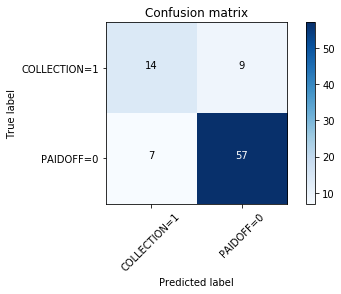

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, KNN.predict(x_test), labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION=1','PAIDOFF=0'],normalize= False,  title='Confusion matrix')

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
max_depth = [3, 4, 5, 6, 7]
test_acc = []
for d in max_depth:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_test)
    test_acc.append(f1_score(y_test, y_pred, average='weighted') )#metrics.accuracy_score(y_test, y_pred))
    print("DecisionTrees's test Accuracy: ", metrics.accuracy_score(y_test, y_pred),"for max_depth = ",d)

DecisionTrees's test Accuracy:  0.735632183908046 for max_depth =  3
DecisionTrees's test Accuracy:  0.735632183908046 for max_depth =  4
DecisionTrees's test Accuracy:  0.735632183908046 for max_depth =  5
DecisionTrees's test Accuracy:  0.7471264367816092 for max_depth =  6
DecisionTrees's test Accuracy:  0.7011494252873564 for max_depth =  7


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
best_depth = max_depth[np.argmax(test_acc)]
print(best_depth)

6


**Training with entire dataset**

In [41]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = best_depth)
DT.fit(x1,y1)
y_pred = DT.predict(x1)
print("DecisionTrees's Test Accuracy: ", metrics.accuracy_score(y1, y_pred))
print("DecisionTrees's F1 score: ", f1_score(y1, y_pred, average='weighted') ) #metrics.accuracy_score(y, y_pred))

DecisionTrees's Test Accuracy:  0.7832369942196532
DecisionTrees's F1 score:  0.7323063690240286


Confusion matrix, without normalization
[[ 5 18]
 [ 0 64]]


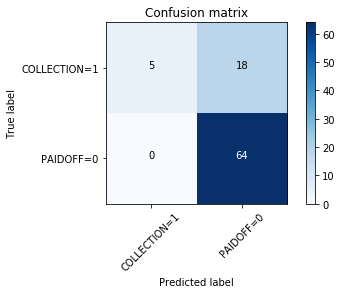

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, DT.predict(x_test), labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION=1','PAIDOFF=0'],normalize= False,  title='Confusion matrix')

# Support Vector Machine

In [43]:
from sklearn import svm
svc = svm.SVC(kernel='rbf', C = 5)#'rbf')
svc.fit(x_train, y_train) 
yhat = svc.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
acc = []
for c in [0.0001,0.001,0.1,1,5,10,50,100,1000,10000,100000,1000000,10000000,100000000,1000000000]:
    svc = svm.SVC(kernel='rbf', C = c)#'rbf')
    svc.fit(x_train, y_train) 
    yhat = svc.predict(x_test)
    print(c,"SVM's Test Accuracy: ", metrics.accuracy_score(y_test, yhat))
    print("SVM's F1 score: ", f1_score(y_test, yhat, average='weighted'))
    acc.append(f1_score(y_test, yhat, average='weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for 

0.0001 SVM's Test Accuracy:  0.735632183908046
SVM's F1 score:  0.6235822486107939
0.001 SVM's Test Accuracy:  0.735632183908046
SVM's F1 score:  0.6235822486107939
0.1 SVM's Test Accuracy:  0.735632183908046
SVM's F1 score:  0.6235822486107939
1 SVM's Test Accuracy:  0.7471264367816092
SVM's F1 score:  0.6497701149425287
5 SVM's Test Accuracy:  0.735632183908046
SVM's F1 score:  0.6957469041108072
10 SVM's Test Accuracy:  0.7241379310344828
SVM's F1 score:  0.6773919378338998
50 SVM's Test Accuracy:  0.7241379310344828
SVM's F1 score:  0.7096242923314462
100 SVM's Test Accuracy:  0.7126436781609196
SVM's F1 score:  0.6943052690179127
1000 SVM's Test Accuracy:  0.7241379310344828
SVM's F1 score:  0.727695675971538
10000 SVM's Test Accuracy:  0.7471264367816092
SVM's F1 score:  0.7503877029739098
100000 SVM's Test Accuracy:  0.7586206896551724
SVM's F1 score:  0.7568742760402744


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1000000 SVM's Test Accuracy:  0.7586206896551724
SVM's F1 score:  0.7631133004926107


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


10000000 SVM's Test Accuracy:  0.7701149425287356
SVM's F1 score:  0.7730797299762817


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


100000000 SVM's Test Accuracy:  0.7241379310344828
SVM's F1 score:  0.7241379310344828


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1000000000 SVM's Test Accuracy:  0.7126436781609196
SVM's F1 score:  0.714569336206415


In [45]:
svc = svm.SVC(kernel='rbf', C = 10000000 )#'rbf')
svc.fit(X, y) 
yhat = svc.predict(x_test)

In [46]:
print("SVM's Train Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("SVM's F1 score: ", f1_score(y_test, yhat, average='weighted') )

SVM's Train Accuracy:  0.8735632183908046
SVM's F1 score:  0.8744105079308226


Confusion matrix, without normalization
[[18  5]
 [ 6 58]]


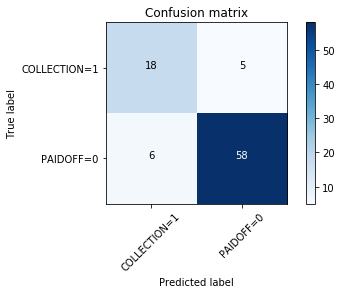

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION=1','PAIDOFF=0'],normalize= False,  title='Confusion matrix')

In [48]:
yhat

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
acc1 = []
for c in [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    LR = LogisticRegression(penalty='l2',C = c, solver='liblinear').fit(x_train,y_train)
    yhat = LR.predict(x_test)
    print(c,"LR's Test Accuracy: ", metrics.accuracy_score(y_test, yhat))
    print("LR's F1 score: ", f1_score(y_test, yhat, average='weighted'))
    acc1.append(f1_score(y_test, yhat, average='weighted'))

0.0001 LR's Test Accuracy:  0.7126436781609196
LR's F1 score:  0.6943052690179127
0.001 LR's Test Accuracy:  0.7241379310344828
LR's F1 score:  0.7032134087754884
0.01 LR's Test Accuracy:  0.7126436781609196
LR's F1 score:  0.6122039651315281
0.1 LR's Test Accuracy:  0.7471264367816092
LR's F1 score:  0.6814337449670468
1 LR's Test Accuracy:  0.735632183908046
LR's F1 score:  0.6855376733018558
10 LR's Test Accuracy:  0.735632183908046
LR's F1 score:  0.6855376733018558
100 LR's Test Accuracy:  0.735632183908046
LR's F1 score:  0.6855376733018558
1000 LR's Test Accuracy:  0.735632183908046
LR's F1 score:  0.6855376733018558


In [50]:
LR = LogisticRegression(penalty='l2',C = 0.001, solver='liblinear').fit(X,y)
yhat = LR.predict(x_test)

In [51]:
print("LR F1 score: ", f1_score(y_test, yhat, average='weighted') ) #metrics.accuracy_score(y, y_pred))

LR F1 score:  0.6855376733018558


Confusion matrix, without normalization
[[ 4 19]
 [ 4 60]]


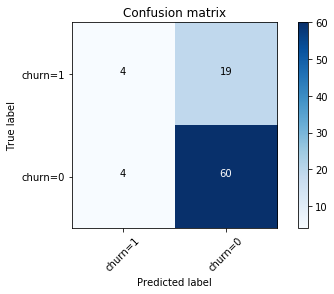

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [53]:
print("LR Train Accuracy: ", metrics.accuracy_score(y_test, yhat))

LR Train Accuracy:  0.735632183908046


In [54]:
jaccard_similarity_score(y_test, yhat)

0.735632183908046

In [55]:
from sklearn.metrics import log_loss
yhat_prob = LR.predict_proba(x_test)
log_loss(y_test, yhat_prob)

0.6641240205515845

# Model Evaluation using Test set

In [56]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [57]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-12-24 10:39:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-12-24 10:39:49 (390 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [58]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [59]:
kf  = test_df[['loan_status', 'Principal', 'terms','effective_date', 'due_date', 'age', 'education', 'Gender']] # discard the col1 and column 2 as they are index
test_df = kf

In [60]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [61]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [62]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [63]:
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [64]:
test_X = Feature
prepro = preprocessing.StandardScaler().fit(test_X)
test_X = prepro.transform(test_X)
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [65]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_y = test_df['loan_status'].values
#test_y

**KNN**

In [66]:
yth = KNN.predict(test_X)
print("Jaccard score for KNN:", jaccard_similarity_score(test_y, yth))
#print("Train accuracy:", metrics.accuracy_score(test_y, yth)*100,"%")
print("F1 score for KNN: " , f1_score(test_y, yth, average='weighted'))

Jaccard score for KNN: 0.7222222222222222
F1 score for KNN:  0.7105756358768406


**DecisionTrees**

In [67]:
yth = DT.predict(test_X)
print("Jaccard score for DecisionTrees:", jaccard_similarity_score(test_y, yth))
#print("Train accuracy:", metrics.accuracy_score(test_y, yth)*100,"%")
print("F1 score for DecisionTrees: " , f1_score(test_y, yth, average='weighted'))

Jaccard score for DecisionTrees: 0.7407407407407407
F1 score for DecisionTrees:  0.7006734006734008


**SVC**

In [68]:
yth = svc.predict(test_X)
print("Jaccard score for SVC:", jaccard_similarity_score(test_y, yth))
#print("Train accuracy:", metrics.accuracy_score(test_y, yth)*100,"%")
print("F1 score for SVC: " , f1_score(test_y, yth, average='weighted'))

Jaccard score for SVC: 0.5740740740740741
F1 score for SVC:  0.5863861347732316


**Logistic_Regression**

In [70]:
yth = LR.predict(test_X)
print("Jaccard score for LR:", jaccard_similarity_score(test_y, yth))
print("F1 score for LR: " , f1_score(test_y, yth, average='weighted'))
print("logloss score for LR: " , log_loss(y_test, yhat_prob) )

Jaccard score for LR: 0.7592592592592593
F1 score for LR:  0.6717642373556352
logloss score for LR:  0.6641240205515845


# Results

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.72    | 0.71     | NA      |
| Decision Tree      | 0.74    | 0.70     | NA      |
| SVM                | 0.57    | 0.59     | NA      |
| LogisticRegression | 0.76    | 0.67     | 0.66    |

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>